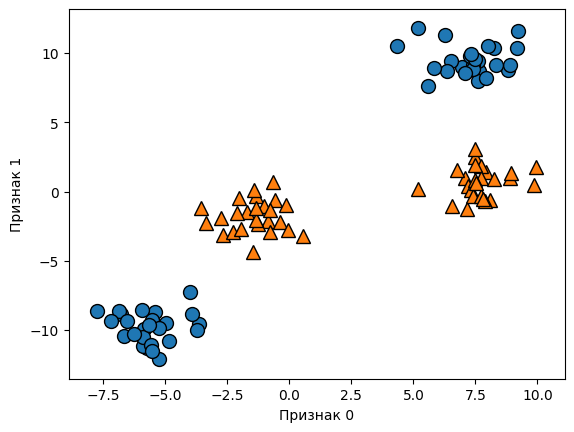

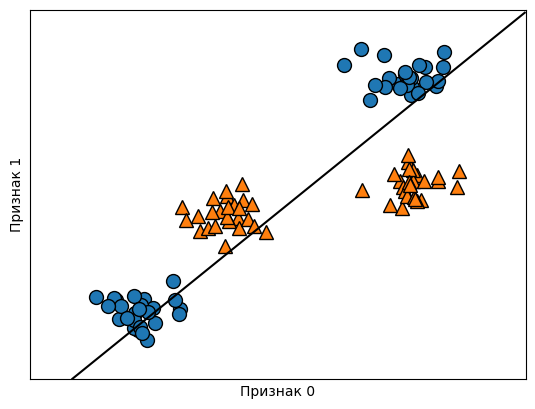

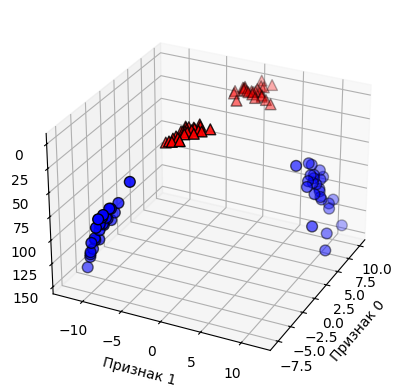

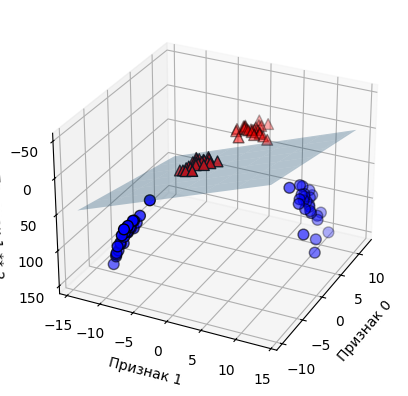

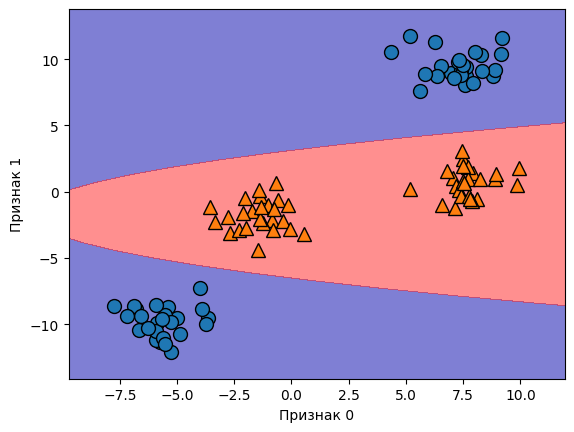

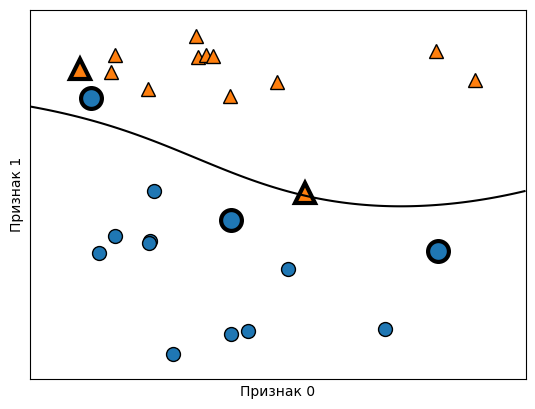

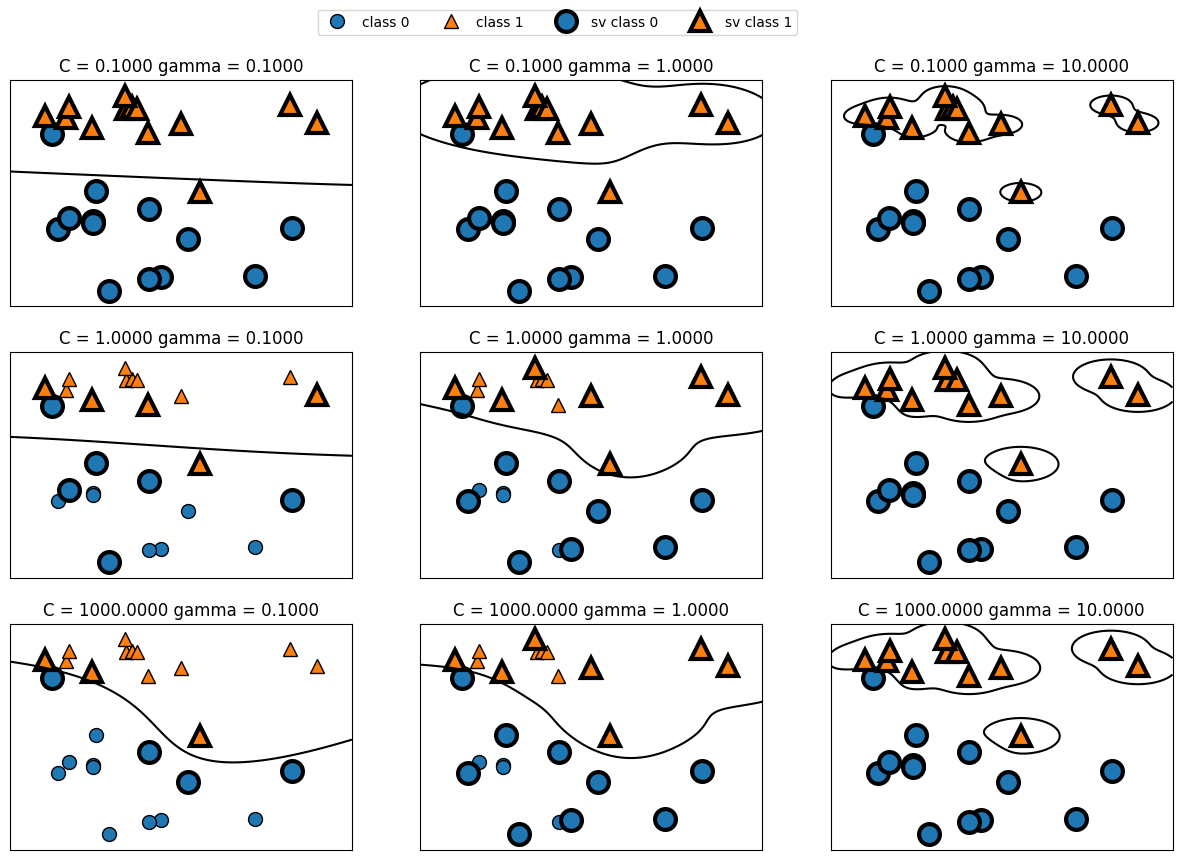

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.94


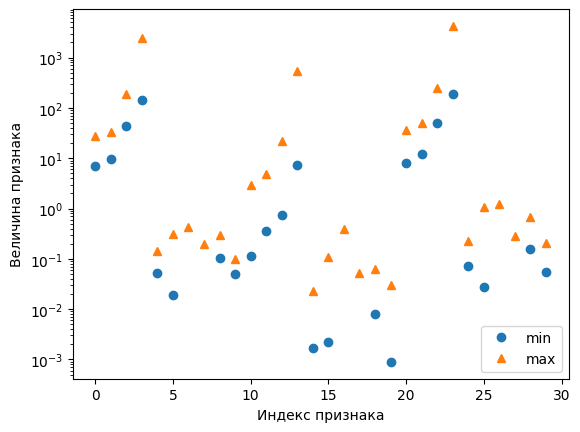

Минимальное значение для каждого признака
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Правильность на обучающем наборе: 0.984
Правильность на тестовом наборе: 0.972
Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn
import mglearn
import matplotlib.pyplot as plt
import numpy as np

import warnings
# from sklearn.datasets import load_boston
warnings.filterwarnings("ignore")

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

X_new = np.hstack([X, X[:, 1:] ** 2])
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=-152, azim=-26)

mask = y == 0

ax.scatter3D(X_new[mask, 0], X_new[mask, 1],
             X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter3D(X_new[~mask, 0], X_new[~mask, 1],
             X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("Признак 0")
ax.set_ylabel("Признак 1")
ax.set_zlabel("Признак 1  2")
plt.show()

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter3D(X_new[mask, 0], X_new[mask, 1],
             X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter3D(X_new[~mask, 0], X_new[~mask, 1],
             X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')

ax.set_xlabel("Признак 0")
ax.set_ylabel("Признак 1")
ax.set_zlabel("Признак 1 ** 2")
plt.show()

ZZ = YY**2
dec = linear_svm_3d.decision_function(
    np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[
             dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(
    sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0",
                  "sv class 1"], ncol=4, loc=(.9, 1.2))
plt.show()

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(
    svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    svc.score(X_test, y_test)))
plt.show()

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")
plt.show()


min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(
    X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(
    X_train_scaled.max(axis=0)))
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    svc.score(X_test_scaled, y_test)))

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    svc.score(X_test_scaled, y_test)))
